In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [2]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


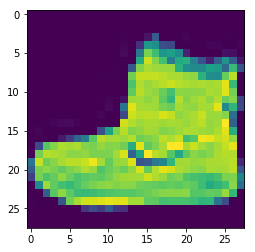

In [4]:
# view one of the training images
plt.imshow(x_train[0])

In [11]:
# create validation dataset
(x_train, x_val) = x_train[2000:], x_train[:2000]
(y_train, y_val) = y_train[2000:], y_val[:2000]

print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_train.shape, y_train.shape)

Validation: (2000, 28, 28) (2000,)
Test: (58000, 28, 28) (58000,)


In [12]:
x_train[0].shape, y_train.shape

(28, 28)

In [13]:
# reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
x_val = x_val.reshape(x_val.shape[0], w, h, 1)

In [14]:
num_classes = 10 # number of probable classes in the dataset

In [15]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [16]:
# define a simple cnn model
baseline_model = tf.keras.Sequential()

In [17]:
# add a convolution block
baseline_model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=2,
    padding="same",
    activation="relu",
    input_shape=(28, 28, 1)))

# add a maxpooling layer
baseline_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.3))

In [18]:
# add another convolutional block
baseline_model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=2,
    padding="same",
    activation="relu"))

# add a maxpooling layer
baseline_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.3))

In [19]:
# now flatten the output
baseline_model.add(tf.keras.layers.Flatten())

# add a dense layer with relu activation
baseline_model.add(tf.keras.layers.Dense(256, activation="relu"))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.5))

# now add the final output layer: softmax layer
baseline_model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [20]:
# summarise model
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [21]:
# compile the model
baseline_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [24]:
ckp = tf.keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [25]:
# train the model
baseline_model.fit(x_train,
                  y_train,
                  batch_size=64,
                  epochs=20,
                  validation_data=(x_val, y_val),
                  callbacks=[ckp])

Train on 58000 samples, validate on 2000 samples
Epoch 1/20
57920/58000 [============================>.] - ETA: 0s - loss: 3.4538 - acc: 0.6358
Epoch 00001: val_loss improved from inf to 8.31151, saving model to model.weights.best.hdf5
58000/58000 [==============================] - 34s 584us/step - loss: 3.4502 - acc: 0.6359 - val_loss: 8.3115 - val_acc: 0.1055
Epoch 2/20
57984/58000 [============================>.] - ETA: 0s - loss: 0.5341 - acc: 0.8040
Epoch 00002: val_loss did not improve from 8.31151
58000/58000 [==============================] - 34s 594us/step - loss: 0.5340 - acc: 0.8040 - val_loss: 9.4713 - val_acc: 0.1055
Epoch 3/20
57984/58000 [============================>.] - ETA: 0s - loss: 0.4643 - acc: 0.8294
Epoch 00003: val_loss did not improve from 8.31151
58000/58000 [==============================] - 66s 1ms/step - loss: 0.4643 - acc: 0.8294 - val_loss: 9.7027 - val_acc: 0.1065
Epoch 4/20
57984/58000 [============================>.] - ETA: 0s - loss: 0.4236 - acc: 0.

In [32]:
score = baseline_model.evaluate(x_test, y_test, verbose=1)

8000/8000 [==============================] - 1s 134us/step


In [34]:
print("Test Accuracy = ", score[1])

Test Accuracy =  0.90325
